In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## __1 - Business Problem__  
___Build a random forest for the ‘iris’ data___  

## __2 - Data collection and description__ 

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
df1 = df.copy()

In [5]:
df1

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

In [6]:
df1.describe().T

count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0

In [7]:
df1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
df1.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [9]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

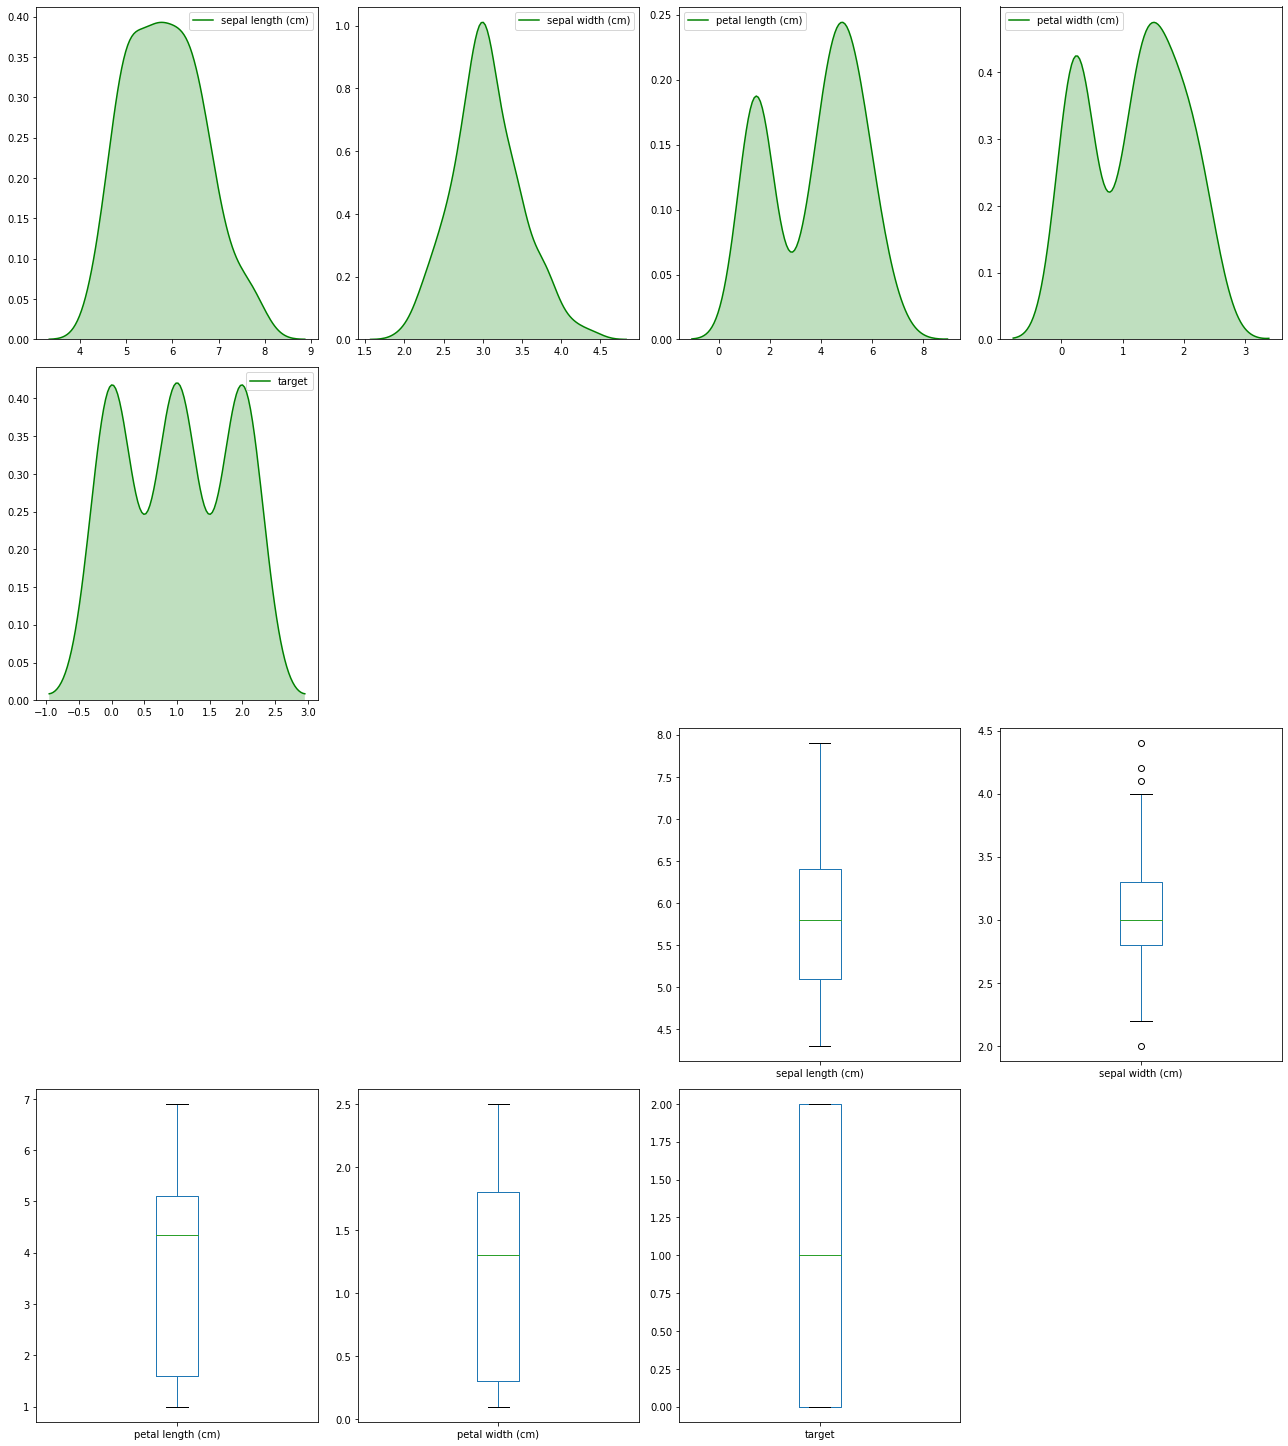

sepal length (cm)  sepal width (cm)  petal length (cm)  \
skewness           0.314911          0.318966          -0.274884   
kurtosis          -0.552064          0.228249          -1.402103   

          petal width (cm)    target  
skewness         -0.102967  0.000000  
kurtosis         -1.340604 -1.510135

In [10]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [11]:
corr = df1.corr()

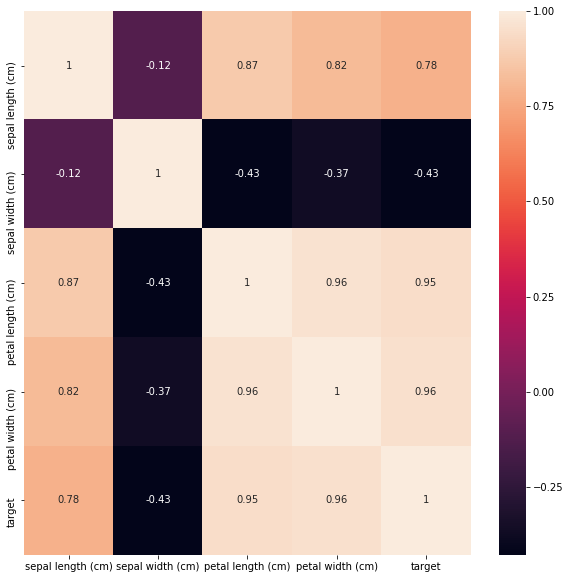

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## __3 - Random Forest Model__ 

In [13]:
df1.target.unique()

array([0., 1., 2.])

In [14]:
list(df1.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [15]:
X = df1.iloc[:,0:4]
y = df1.iloc[:,4]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
y_train.value_counts()

0.0    41
1.0    40
2.0    39
Name: target, dtype: int64

In [18]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.9583333333333334

In [19]:
pred_train = model.predict(x_train)

In [20]:
accuracy_score(y_train,pred_train)

1.0

In [21]:
confusion_matrix(y_train,pred_train)

array([[41,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 39]], dtype=int64)

In [22]:
pred_test = model.predict(x_test)

In [23]:
accuracy_score(y_test,pred_test)

0.9

In [24]:
confusion_matrix(y_test,pred_test)

array([[9, 0, 0],
       [0, 9, 1],
       [0, 2, 9]], dtype=int64)

In [25]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [26]:
df_t

Actual  Predicted
61      1.0        1.0
96      1.0        1.0
19      0.0        0.0
114     2.0        2.0
28      0.0        0.0
24      0.0        0.0
3       0.0        0.0
106     2.0        1.0
99      1.0        1.0
53      1.0        1.0
43      0.0        0.0
145     2.0        2.0
102     2.0        2.0
143     2.0        2.0
122     2.0        2.0
60      1.0        1.0
128     2.0        2.0
4       0.0        0.0
89      1.0        1.0
119     2.0        1.0
146     2.0        2.0
104     2.0        2.0
41      0.0        0.0
80      1.0        1.0
130     2.0        2.0
48      0.0        0.0
34      0.0        0.0
76      1.0        1.0
57      1.0        1.0
70      1.0        2.0

In [27]:
cols = list(df1.columns)

In [28]:
predictors = cols[0:4]
target = cols[4]

In [29]:
tree1 = model.estimators_[20]

In [30]:
dot_data = StringIO()

In [31]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [32]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [33]:
graph.write_png('iris_full.png')

True

## __4 - Conclusion__ 

### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 96%  

In [34]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [35]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [36]:
tree_small = rf_small.estimators_[5]

In [37]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [38]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [39]:
graph.write_png('iris_small.png')

True

In [40]:
img = mpimg.imread('C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Random Forest/iris_small.png') 

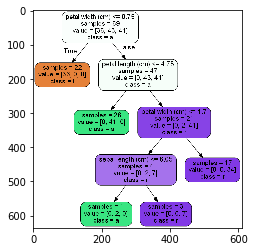

In [41]:
plt.imshow(img)

In [42]:
model.feature_importances_

array([0.07489195, 0.01235406, 0.43275282, 0.48000117])

In [43]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [44]:
fi

feature  importance
3   petal width (cm)    0.480001
2  petal length (cm)    0.432753
0  sepal length (cm)    0.074892
1   sepal width (cm)    0.012354

### As seen in the above table petal width is most important feature